In [1]:
from data_science_tools_for_pendigits_rough_paths import *
from threading import Thread
from multiprocessing.dummy import Pool as ThreadPool
import iisignature
from itertools import combinations
import networkx as nx

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['figure.figsize'] = (12, 8)

# Simple pendigits

There are 2 versions of the pendigits dataset. One version is much simpler than the one with strokes. Indeed, in the simplified dataset paths have been pre-scaled and bounded in the unitary square. A digit-path contains 8 observations points in $R^2$. This uniformization makes it accessible to almost any ML algorithm: This is what a digit looks like:

In [31]:
x_pendigit_train, y_pendigit_train, x_pendigit_test, y_pendigit_test = get_simplified_pendigits()

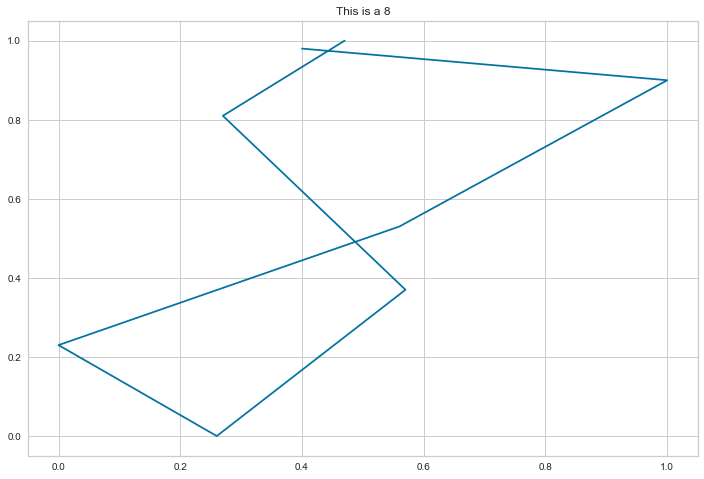

In [32]:
plt.plot(x_pendigit_train[0].T[0], x_pendigit_train[0].T[1])
plt.title('This is a {}'.format(y_pendigit_train[0]))
plt.show()

In [46]:
x_p_tr = []
for x_tr in x_pendigit_train:
    x_p_tr.append(x_tr.reshape(1,-1)[0])
x_p_te = []
for x_te in x_pendigit_test:
    x_p_te.append(x_te.reshape(1,-1)[0])    

By simply applying the sklearn version of KNN we get the following, very good results (as Hao pointed out):

In [49]:
for neighb in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=neighb, 
                                 algorithm='auto', 
                                 metric='euclidean', 
                                 weights='distance', 
                                 n_jobs=-1)
    model.fit(x_p_tr, y_pendigit_train)
    print('K: {} ---> Accuracy: {:.4f} %'.format(neighb, model.score(x_p_te, y_pendigit_test)))

K: 1 ---> Accuracy: 0.9774 %
K: 2 ---> Accuracy: 0.9774 %
K: 3 ---> Accuracy: 0.9783 %
K: 4 ---> Accuracy: 0.9791 %
K: 5 ---> Accuracy: 0.9771 %
K: 6 ---> Accuracy: 0.9777 %
K: 7 ---> Accuracy: 0.9763 %
K: 8 ---> Accuracy: 0.9771 %
K: 9 ---> Accuracy: 0.9760 %


# Questions

### $100 Question: can we do better than this using signatures on the more complicated dataset (with strokes)?

### $1000 Question: can we beat state-of-the-art performance on the complicated version of pendigits?

# What does the "real" dataset look like ?

FloatProgress(value=0.0)

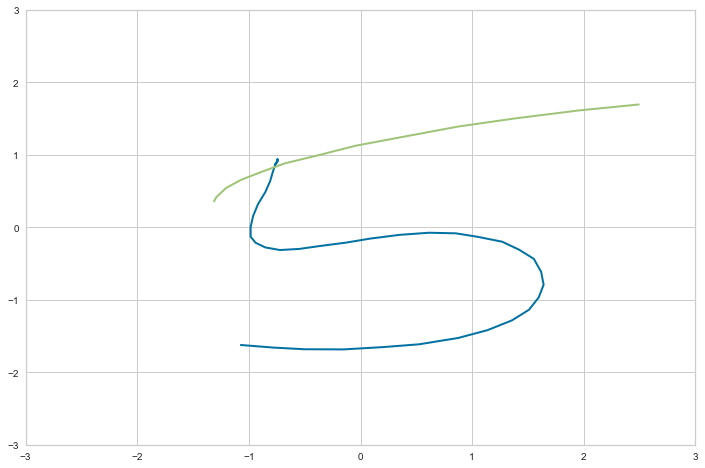

In [4]:
plotter.plot_digit(train_digits[8], True)

## We can apply different paths transforms to the inputs, to take strokes into account

### Stroke-transform

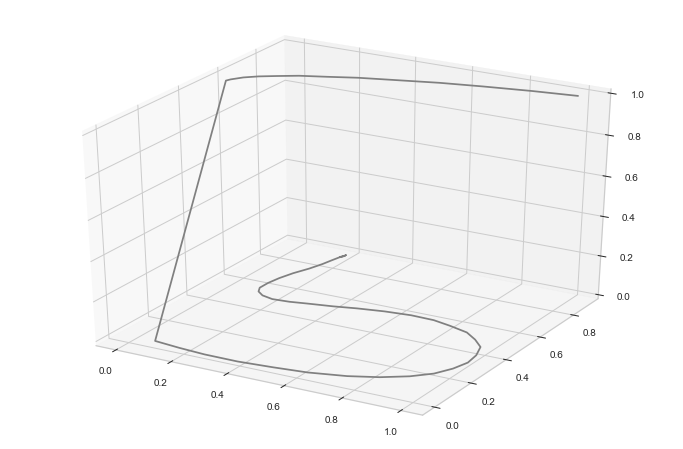

In [5]:
a = X_train_stroke[8]
ax = plt.axes(projection='3d')
ax.plot3D(a.T[0], a.T[1], a.T[2], 'gray')
plt.show()

### Ink-transform

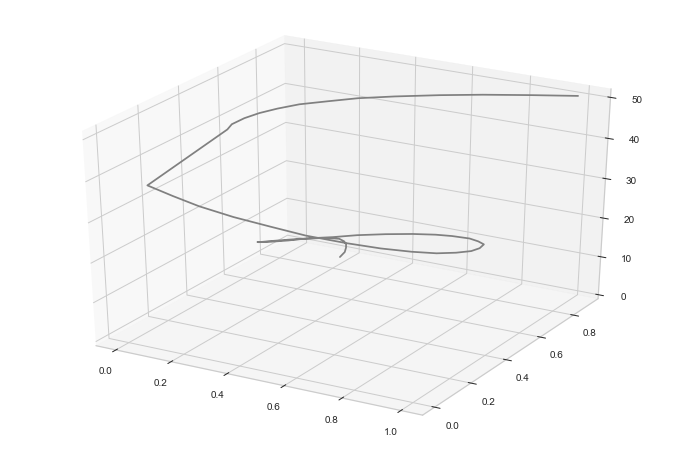

In [6]:
a = X_train_ink[8]
ax = plt.axes(projection='3d')
ax.plot3D(a.T[0], a.T[1], a.T[2], 'gray')
plt.show()

### Pen-transform

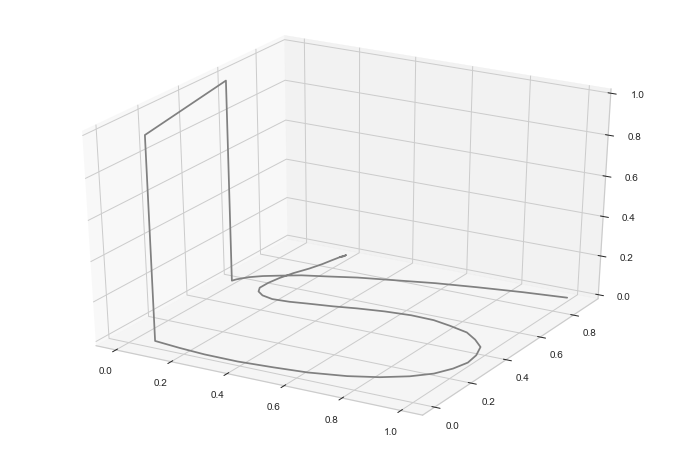

In [7]:
a = X_train_pen[8]
ax = plt.axes(projection='3d')
ax.plot3D(a.T[0], a.T[1], a.T[2], 'gray')
plt.show()

# Randomized Search to compare various classifiers

### Step 1
First we apply the signature transform to the FULL input paths.
We try on paths with no transform, paths with Pen-transform and paths with Stroke-transform.

### Step 2
Then we use the following classification models:

"Radius Neighbors",
"Nearest Neighbors", 
"Gaussian Kernel Support Vector Machine",
"Polynomial Kernel Support Vector Machine", 
"Random Forest", 
"Neural Net", 
"Boosting Tree (AdaBoost)"

### Step 3
with the following hyper-parameters combinations (in order):

* KNN_Radius_Classfier --->    {'radius': np.linspace(start=0.5, stop=2, num=20)}, 


* KNN_Classifier ---> {'n_neighbors': [1, 3, 4, 5, 6, 7, 8, 9]}


* Gaussian SVM_Classifier ---> {'C': [10, 50, 100, 200], 'gamma':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], 'shrinking':[True, False]}, 


* Poly SVM_Classifier ---> {'C': [10, 50, 100, 200], 'gamma':[0.005, 0.01, 0.05, 0.1, 0.5, 1.], 'shrinking':[True, False]}, 


* Random_Forest_Classifier ----> {'n_estimators':[200, 500], 'max_depth':[5, 10, None], 'max_features':[5, 10, 'auto']}, 


* sklearn_Neural_Net ---->  {'activation':['logistic', 'tanh', 'relu'],  'alpha':[0.001, 0.01, 0.1, 1.],  'learning_rate':['constant', 'adaptive'], 'early_stopping':[True, False], 'hidden_layer_sizes':[(100,), (100, 100,), (50, 100, 50,)]}, 


* Boosting_Tree (AdaBoost) ---> {'n_estimators':[10, 50, 100, 500], 'learning_rate':[0.01, 0.1, 1.]} 

In [8]:
pendigits_signatures_random_search(depth=4, k_folds=4)

NO transform
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   32.0s finished


Radius Neighbors accuracy: 0.8136 % -- time taken: 33.05 s
best parameters:
{'radius': 2.0}


Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   11.6s finished


Nearest Neighbors accuracy: 0.9182 % -- time taken: 12.20 s
best parameters:
{'n_neighbors': 3}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   24.4s finished


Gaussian Kernel Support Vector Machine accuracy: 0.9277 % -- time taken: 25.86 s
best parameters:
{'shrinking': True, 'gamma': 0.1, 'C': 50}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   53.0s finished


Polynomial Kernel Support Vector Machine accuracy: 0.9208 % -- time taken: 58.96 s
best parameters:
{'shrinking': False, 'gamma': 0.5, 'C': 10}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.2min finished


Random Forest accuracy: 0.9219 % -- time taken: 156.00 s
best parameters:
{'n_estimators': 500, 'max_features': 10, 'max_depth': None}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.5min finished


Neural Net accuracy: 0.9365 % -- time taken: 101.30 s
best parameters:
{'learning_rate': 'constant', 'hidden_layer_sizes': (100, 100), 'early_stopping': False, 'alpha': 0.001, 'activation': 'relu'}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished


Boosting Tree (AdaBoost) accuracy: 0.7138 % -- time taken: 67.72 s
best parameters:
{'n_estimators': 100, 'learning_rate': 0.01}


pen transform
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.3min finished


Radius Neighbors accuracy: 0.6248 % -- time taken: 138.09 s
best parameters:
{'radius': 1.9210526315789473}


Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   57.4s finished


Nearest Neighbors accuracy: 0.9285 % -- time taken: 58.85 s
best parameters:
{'n_neighbors': 1}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   56.9s finished


Gaussian Kernel Support Vector Machine accuracy: 0.9437 % -- time taken: 59.36 s
best parameters:
{'shrinking': True, 'gamma': 0.01, 'C': 200}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   44.3s finished


Polynomial Kernel Support Vector Machine accuracy: 0.9302 % -- time taken: 47.38 s
best parameters:
{'shrinking': False, 'gamma': 0.5, 'C': 200}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.5min finished


Random Forest accuracy: 0.9351 % -- time taken: 104.15 s
best parameters:
{'n_estimators': 500, 'max_features': 10, 'max_depth': None}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.3min finished


Neural Net accuracy: 0.9434 % -- time taken: 145.37 s
best parameters:
{'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'early_stopping': False, 'alpha': 0.1, 'activation': 'relu'}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.5min finished


Boosting Tree (AdaBoost) accuracy: 0.7484 % -- time taken: 159.52 s
best parameters:
{'n_estimators': 100, 'learning_rate': 0.01}


stroke transform
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.8min finished


Radius Neighbors accuracy: 0.6354 % -- time taken: 109.47 s
best parameters:
{'radius': 1.9210526315789473}


Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   43.2s finished


Nearest Neighbors accuracy: 0.9331 % -- time taken: 44.21 s
best parameters:
{'n_neighbors': 4}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   52.6s finished


Gaussian Kernel Support Vector Machine accuracy: 0.9428 % -- time taken: 54.10 s
best parameters:
{'shrinking': True, 'gamma': 0.005, 'C': 200}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   29.0s finished


Polynomial Kernel Support Vector Machine accuracy: 0.9365 % -- time taken: 30.67 s
best parameters:
{'shrinking': False, 'gamma': 0.1, 'C': 200}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.6min finished


Random Forest accuracy: 0.9365 % -- time taken: 99.38 s
best parameters:
{'n_estimators': 200, 'max_features': 'auto', 'max_depth': None}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.3min finished


Neural Net accuracy: 0.9397 % -- time taken: 150.97 s
best parameters:
{'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 50), 'early_stopping': False, 'alpha': 0.01, 'activation': 'tanh'}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.9min finished


Boosting Tree (AdaBoost) accuracy: 0.7506 % -- time taken: 121.94 s
best parameters:
{'n_estimators': 100, 'learning_rate': 0.01}




# Simple classification models on signatures:

We are now interested in understanding how the signature scaling factor might affect the quality of classiffication 

## 1) how does signature scaling affect K-NN?

In [ ]:
depth = 5
neighbors = 5
model = 'knn'
model_name = '{}-NN'.format(neighbors)
accuracies, accuracies_norm = model_performance(model, model_name, depth)

In [67]:
accuracies, accuracies_norm = model_performance(model, model_name, depth)

--- 5-NN model fitting with No-path transform, degree 7 signatures & scale factor: 1.05 ---
--- 5-NN model fitting with No-path transform, degree 7 signatures & scale factor: 3.405263157894737 ---
--- 5-NN model fitting with No-path transform, degree 7 signatures & scale factor: 5.760526315789473 ---
--- 5-NN model fitting with No-path transform, degree 7 signatures & scale factor: 8.11578947368421 ---


--- 5-NN model fitting with ink-path transform, degree 7 signatures & scale factor: 1.05 ---
--- 5-NN model fitting with ink-path transform, degree 7 signatures & scale factor: 3.405263157894737 ---
--- 5-NN model fitting with ink-path transform, degree 7 signatures & scale factor: 5.760526315789473 ---
--- 5-NN model fitting with ink-path transform, degree 7 signatures & scale factor: 8.11578947368421 ---


--- 5-NN model fitting with pen-path transform, degree 7 signatures & scale factor: 1.05 ---
--- 5-NN model fitting with pen-path transform, degree 7 signatures & scale factor: 3.4

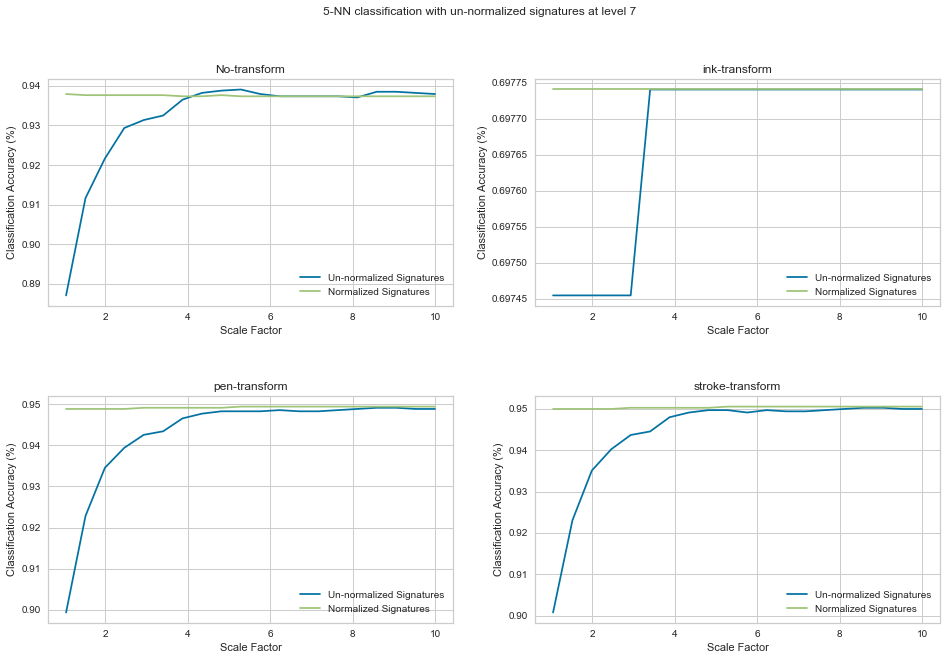

In [68]:
plot_results(accuracies, accuracies_norm, model_name, depth)

# 2) how does signature scaling affect Random Forest?

In [53]:
depth = 5
model = 'rf'
model_name = 'Random Forest'
accuracies, accuracies_norm = model_performance(model, model_name, depth)

In [55]:
accuracies, accuracies_norm = model_performance(model, model_name, depth)

--- Random Forest model fitting with No-path transform, degree 5 signatures & scale factor: 1.05 ---
--- Random Forest model fitting with No-path transform, degree 5 signatures & scale factor: 3.405263157894737 ---
--- Random Forest model fitting with No-path transform, degree 5 signatures & scale factor: 5.760526315789473 ---
--- Random Forest model fitting with No-path transform, degree 5 signatures & scale factor: 8.11578947368421 ---


--- Random Forest model fitting with ink-path transform, degree 5 signatures & scale factor: 1.05 ---
--- Random Forest model fitting with ink-path transform, degree 5 signatures & scale factor: 3.405263157894737 ---
--- Random Forest model fitting with ink-path transform, degree 5 signatures & scale factor: 5.760526315789473 ---
--- Random Forest model fitting with ink-path transform, degree 5 signatures & scale factor: 8.11578947368421 ---


--- Random Forest model fitting with pen-path transform, degree 5 signatures & scale factor: 1.05 ---
--- Ra

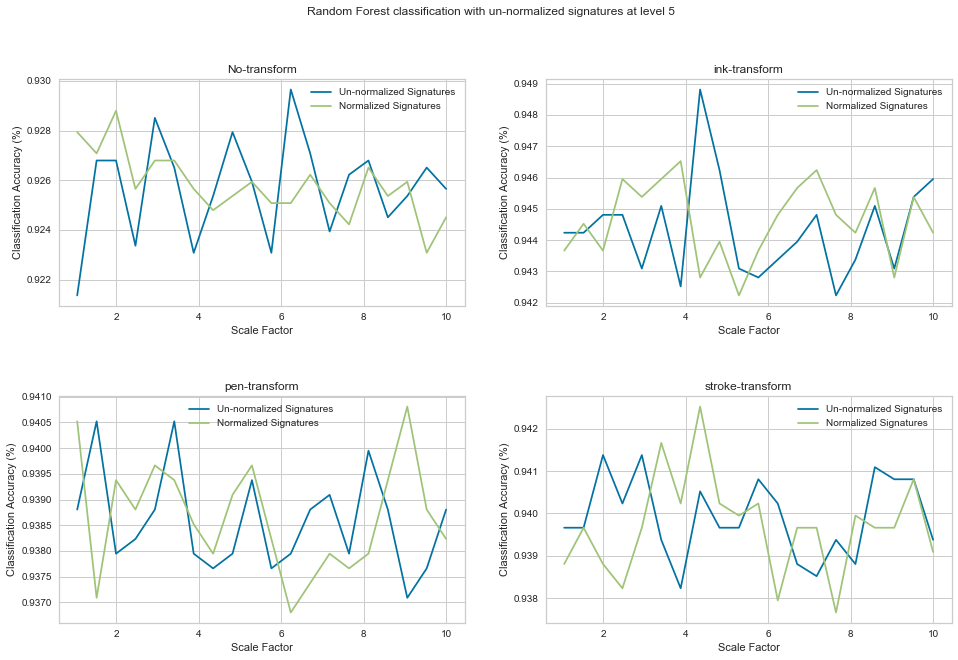

In [56]:
plot_results(accuracies, accuracies_norm, model_name, depth)

### Random Forest offer the functionality "feature_importance" which allows to see which are the features in input space that mostly affected the classification result, and subsequently rank them by importance

In [ ]:
sig_train = [tosig.stream2sig(p, depth) for p in which_transform('ink')[0]]
sig_test = [tosig.stream2sig(p, depth) for p in which_transform('ink')[2]]

rf_sig = RandomForestClassifier()
rf_sig.fit(sig_train, which_transform('ink')[1])

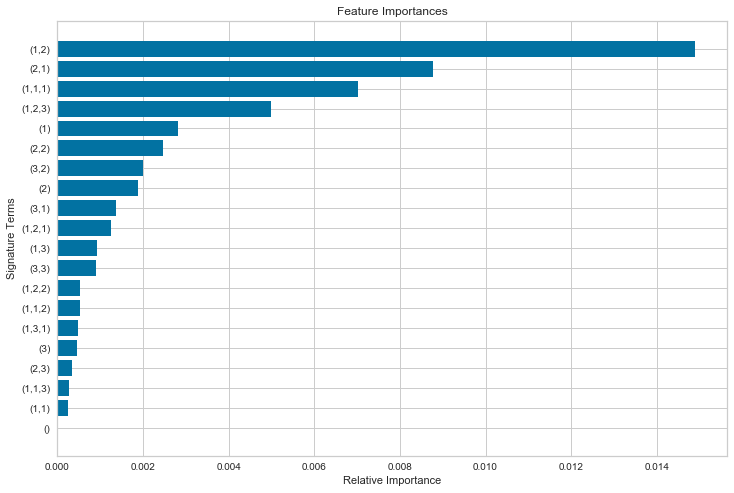

In [16]:
importances = rf_sig.feature_importances_[:20]
indices = np.argsort(importances)
features = tosig.sigkeys(3, depth).replace(' ', ',').split("),(")
features = ['(' + f + ')' for f in features]
features[0] = '()'

plt.title('Feature Importances')
plt.barh(range(len(indices)), rf_sig.feature_importances_[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Signature Terms')
plt.show()

# 3) how does signature scaling affect  SVM?

In [57]:
depth = 5
model = 'svm'
model_name = 'Support Vector Machine'

In [59]:
accuracies, accuracies_norm = model_performance(model, model_name, depth)

--- Support Vector Machine model fitting with No-path transform, degree 5 signatures & scale factor: 1.05 ---
--- Support Vector Machine model fitting with No-path transform, degree 5 signatures & scale factor: 3.405263157894737 ---
--- Support Vector Machine model fitting with No-path transform, degree 5 signatures & scale factor: 5.760526315789473 ---
--- Support Vector Machine model fitting with No-path transform, degree 5 signatures & scale factor: 8.11578947368421 ---


--- Support Vector Machine model fitting with ink-path transform, degree 5 signatures & scale factor: 1.05 ---
--- Support Vector Machine model fitting with ink-path transform, degree 5 signatures & scale factor: 3.405263157894737 ---
--- Support Vector Machine model fitting with ink-path transform, degree 5 signatures & scale factor: 5.760526315789473 ---
--- Support Vector Machine model fitting with ink-path transform, degree 5 signatures & scale factor: 8.11578947368421 ---


--- Support Vector Machine model fit

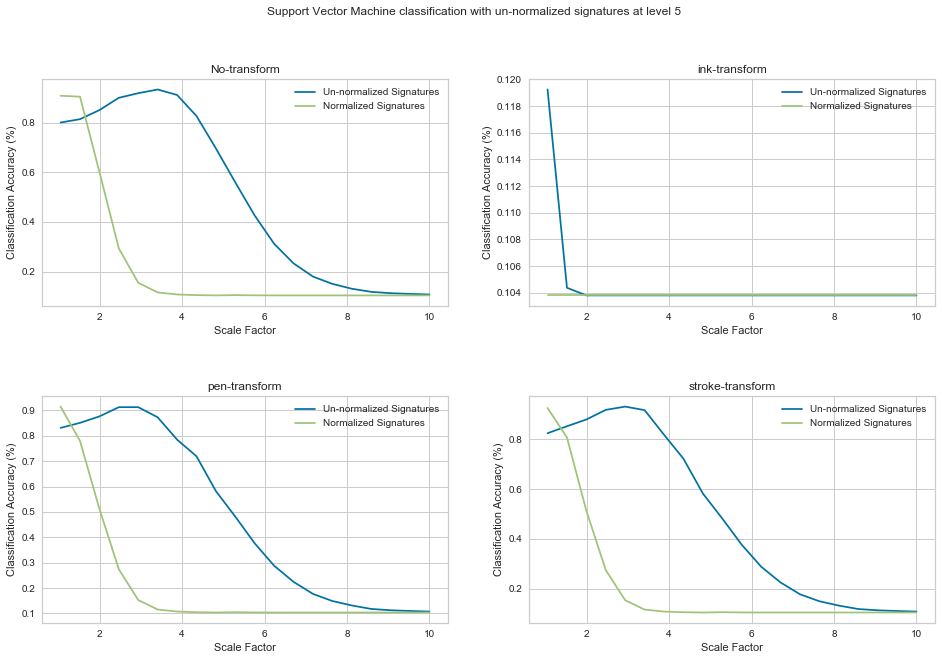

In [60]:
plot_results(accuracies, accuracies_norm, model_name, depth)

# K-NN with Rough Paths metrics or DTW

In the analysis above we saw that no matter which path-transform, signature depth or scaling factor we choose we are never able to achieve more than 95% accuracy on stroke-pendigits classification

Here we propose another approach to signatures-nearest-neighbors classification. 

#### Full paths are too complex for their similarity to be measured and captured in one go. We need to subdivide them into "simple pathlets" and measure their similarity using these local pathlets.

Below we propose 2 different alternative approaches to measure similarity between complex paths:

### 1) Dynamic Time Warping (not our idea!...and no signatures)

### 2) Dyadic pathlets signatures within Dynamic Time Warping

This is an effort to combine DTW and local signatures. To measue similarity between two paths $\gamma_1, \gamma_2$, we take their "dyadic tranforms". Form a path of signature pathlets (consisting of signatures of each dyadic path) and finally calculate dtw distance between these paths of signatures in L2

## p-variation distance for equally sampled paths


$$p_{var}(X, Y, I=[I_{-}, I_{+}]) = (\sup_{D_I} \sum_{t_i \in D_I} ||S(X)_{t_{i-1}, t_i} - S(Y)_{t_{i-1}, t_i})||^p)^{1/p}$$


In [4]:
def p_variation_path(p, path, depth, norm):
    """return rough p-variation"""
    assert norm in ['l1', 'l2']
    length = path.shape[0]
    if norm=='l1':
        sig_norm = lambda sig: np.sum([np.abs(x) for x in sig])
    elif norm=='l2':
        sig_norm = lambda sig: np.sum([x*x for x in sig])
    dist = lambda a,b: sig_norm(tosig.stream2sig(path[a:b+1,:],depth)[1:])
    pv = p_var_backbone(length, p, dist)
    return pv.value
    
def sig_norm1(sig1, sig2):
    """L1 norm"""
    return np.sum([np.abs(x) for x in (sig1-sig2)])

def sig_norm2(sig1, sig2):
    """L2 norm"""
    return np.sum([x*x for x in (sig1-sig2)])

def sig_norm(sig1, sig2, norm='l1'):
    assert norm in ['l1', 'l2']
    if norm == 'l1':
        return sig_norm1(sig1, sig2)
    elif norm == 'l2':
        return sig_norm2(sig1, sig2)

def p_variation_distance(path1, path2, p, depth, norm='l1'):
    """path1 and path2 must be numpy arrays"""
    
    assert norm in ['l1', 'l2']
    assert path1.shape[0] == path2.shape[0]
    assert path1.shape[1] == path2.shape[1]
    
    length = path1.shape[0]

    dist = lambda a,b: sig_norm(tosig.stream2sig(path1[a:b+1,:], depth),
                                tosig.stream2sig(path2[a:b+1,:], depth), norm)
    
    # use Terry algo with complexity O(NlogN) instead of O(N^2)
    pv = p_var_backbone(length, p, dist)
#     pv_ref = p_var_backbone_ref(len(dyad_path1), p, dist)
#     pv_err = abs(pv.value - pv_ref) + p_var_points_check(pv, p, dist)
#     print(pv.value, pv_ref, pv_err)
    
    return pv.value

In [170]:
path1 = np.random.rand(100, 3)
path2 = np.random.rand(100, 3)
p_variation_distance(path1, path2, p=1., depth=3)

272.56202546103464

# Rough Paths or DTW KNN: let's begin!

In [53]:
def RoughPaths_KNN(dyadic_depth=3, sig_depth=3, transform_flag=None, neighbors=1, verbose=True, resampling_size=10, 
                   normalization_flag=True, scale_flag=False, scale_factor=2., print_every_n_instances=20, test_all=False,
                   method='dtw_dyadic_signatures', instances_to_test=10, p_var=2., use_all_data=False, use_centroids=False):
    
    assert method in ['dtw', 'dtw_dyadic_signatures', 'pvariation_dyadic_signatures']
    
    if use_all_data: # use all data
        xx_train = which_transform(transform_flag)[0]
        yy_train = which_transform(transform_flag)[1]

    elif use_centroids: # use centroids
        xx_train = compute_centroids(depth=4, transform_flag=transform_flag, normalize_flag=True)
        yy_train = np.arange(10).tolist()

    else: #use random subsample with equal number of instances per class
        xx_train, yy_train = random_subsample(size=resampling_size, transform_flag=transform_flag) 
    
    xx_test = which_transform(transform_flag)[2]
    yy_test = which_transform(transform_flag)[3]
    if not test_all:
        ss = np.random.choice(np.arange(len(yy_test)), instances_to_test, False)
        xx_test = [xx_test[l] for l in ss]
        yy_test = [yy_test[l] for l in ss]

    # store testing paths
    testing_paths = copy.deepcopy(xx_test)
    
    if method != 'dtw':
        dyadic_transformer = Dyadic(depth=dyadic_depth)
        xx_train = dyadic_transformer.fit_transform(xx_train)
        xx_test = dyadic_transformer.fit_transform(xx_test)
        if transform_flag is None:
            w=2
        else:
            w=3
        if normalization_flag:
            xx_train = [[sig_normalize(tosig.stream2sig(pathlet, sig_depth), width=w) for pathlet in path] for path in xx_train]
            xx_test = [[sig_normalize(tosig.stream2sig(pathlet, sig_depth), width=w) for pathlet in path] for path in xx_test]
        elif scale_flag: 
            xx_train = [[sig_scale(tosig.stream2sig(pathlet, sig_depth), width=w, scale_factor=scale_factor) for pathlet in path] for path in xx_train]
            xx_test = [[sig_scale(tosig.stream2sig(pathlet, sig_depth), width=w, scale_factor=scale_factor) for pathlet in path] for path in xx_test]
        else:
            xx_train = [[tosig.stream2sig(pathlet, sig_depth) for pathlet in path] for path in xx_train]
            xx_test = [[tosig.stream2sig(pathlet, sig_depth) for pathlet in path] for path in xx_test]
       
    
    if method == 'dtw':
        distance_to_use = lambda x_test, x_train: fastdtw(x_test, x_train, dist=euclidean)[0]
    elif method == 'dtw_dyadic_signatures':
        distance_to_use = lambda x_test, x_train: fastdtw(x_test, x_train, dist=euclidean)[0]
    elif method == 'pvariation_dyadic_signatures':
        distance_to_use = lambda x_test, x_train: p_variation_distance(x_train, x_test, p=p_var, width=w)
        
    k_nns=[]
    probabilities=[]
    predictions=[]
    predictions_max_probability=[]
    predictions_nearest_neighbor=[]
    
    num = 1    
    total_time=0.
    for x_test, y_test in zip(xx_test, yy_test):
        
        # time taken for 1 test
        t1 = time.time()
        
        # start_finding neighbors
        distances = []
        labels = []
        for x_train, y_train in zip(xx_train, yy_train):
            d = distance_to_use(x_test, x_train)
            distances.append(d)
            labels.append(y_train)
        good_indices = np.argsort(distances)[:neighbors]
        k_nns.append([labels[m] for m in good_indices])
        
        # sort by distance
        distances.sort()
        distances = distances[:neighbors]
        
        # prediction probabilities
        distances_inverse = [1./d for d in distances]
        pr = [0.]*10
        for lab in range(10):
            for neighb, d_inv in zip(k_nns[-1], distances_inverse):
                if neighb == lab:
                    pr[lab] = pr[lab] + d_inv
        probabilities.append([p/np.sum(distances_inverse) for p in pr])
        
        # predictions
        predictions.append(np.random.choice(np.arange(10), p=probabilities[-1]))
        predictions_max_probability.append(np.arange(10)[np.argmax(probabilities[-1])])
        predictions_nearest_neighbor.append(k_nns[-1][0])
        
        # partial score per instances tested so far
        partial_score = accuracy_score(y_pred=predictions, y_true=yy_test[:num])
        
        # final time
        t2 = time.time()
        total_time += t2 - t1
        
        # print progress
        if verbose:
            if num % print_every_n_instances == 0:
                print('tested {}/{} --- partial_score: {:.2f} % --- avg time: {:.4f} s'.format(num, len(xx_test),
                                                                                               partial_score*100.,
                                                                                               total_time/print_every_n_instances))
                total_time=0.
        num+=1
            
    return probabilities, predictions, predictions_max_probability, predictions_nearest_neighbor, yy_test

In [54]:
def rough_grid_search(method, neighbors, transform_flag, normalization_flag, scale_flag, scale_factor, dyadic_depth, p_var,
                      signature_depth, verbose=True, resampling_size=10, print_every_n_instances=50, instances_to_test=50):
    
    assert method in ['pvariation_dyadic_signatures', 'dtw_dyadic_signatures', 'dtw'] 
    
    dic_tuple = ('method: {}'.format(method),
                 'neighbors: {}'.format(neighbors),
                 'path_transform: {}'.format(transform_flag if method!='dtw' else None),
                 'normalization: {}'.format(normalization_flag if method!='dtw' else None),
                 'scale_flag: {}'.format(scale_flag if method!='dtw' else None),
                 'scaling_factor: {}'.format((None if normalization_flag else scale_factor) if method!='dtw' else None),
                 'dyadic_depth: {}'.format(dyadic_depth if method!='dtw' else None),
                 'sig_depth: {}'.format(signature_depth if method!='dtw' else None),
                 'p_var: {}'.format(p_var if method=='pvariation_dyadic_signatures' else None)
                )
    
    # start classification
    (probabilities, 
     predictions, 
     predictions_max_probability, 
     predictions_nearest_neighbor, 
     yy_test) = RoughPaths_KNN(dyadic_depth=dyadic_depth, 
                               sig_depth=signature_depth, 
                               transform_flag=transform_flag, 
                               neighbors=neighbors, 
                               verbose=verbose, 
                               resampling_size=resampling_size, 
                               normalization_flag=normalization_flag, 
                               print_every_n_instances=print_every_n_instances,
                               scale_flag=scale_flag, 
                               scale_factor=scale_factor, 
                               method=method, 
                               instances_to_test=instances_to_test,
                               p_var=p_var)

    # store scores
    scores_dic[dic_tuple] = accuracy_score(y_pred=predictions, y_true=yy_test)
    scores_max_prob_dic[dic_tuple] = accuracy_score(y_pred=predictions_max_probability, y_true=yy_test)
    scores_nearest_neighbor_dic[dic_tuple] = accuracy_score(y_pred=predictions_nearest_neighbor, y_true=yy_test)
    # store probas
    probabilities_dic[dic_tuple] = probabilities
    # store predictions
    predictions_dic[dic_tuple] = predictions
    predictions_max_probability_dic[dic_tuple] = predictions_max_probability
    predictions_nearest_neighbor_dic[dic_tuple] = predictions_nearest_neighbor
    # store testing data
    yy_test_dic[dic_tuple] = yy_test

In [50]:
# hyper-parameters in search
scale_factors = [0.1, 0.5, 2., 5.]
normalization_flags = [True, False]
signature_depths = [2, 3, 4, 5, 6]
dyadic_depths = [3, 4, 5, 6]
p_variations = [0.5, 2.]

# store information
probabilities_dic = {}
predictions_dic = {}
scores_dic = {}
predictions_max_probability_dic = {}
scores_max_prob_dic = {}
predictions_nearest_neighbor_dic = {}
scores_nearest_neighbor_dic = {}
yy_test_dic = {}

resampling_size = 5
instances_to_test = 50
verbose=False
print_every_n_instances = 50

methods = ['dtw_dyadic_signatures', 'dtw']

for method in methods:
    print('method: {}'.format(method))
    for neighbor in [1]:
        for transform_flag in [None, 'pen']:
            print('transform_flag:{}'.format(transform_flag))
            if method == 'dtw':
                rough_grid_search(method=method, 
                                  neighbors=neighbor, 
                                  transform_flag=transform_flag, 
                                  normalization_flag=None, 
                                  scale_flag=None, 
                                  scale_factor=None, 
                                  dyadic_depth=None, 
                                  p_var=None,
                                  signature_depth=None, 
                                  verbose=verbose, 
                                  resampling_size=resampling_size, 
                                  print_every_n_instances=print_every_n_instances, 
                                  instances_to_test=instances_to_test)
            else:
                for signature_depth in signature_depths:
                    print('signature_depth: {}'.format(signature_depth))
                    for dyadic_depth in dyadic_depths: 
                        print('dyadic_depth: {}'.format(dyadic_depth))
                        for normalization_flag in normalization_flags:                            
                            if normalization_flag:
                                scale_flag=False
                                if method == 'dtw_dyadic_signatures':
                                    rough_grid_search(method=method, 
                                                      neighbors=neighbor, 
                                                      transform_flag=transform_flag, 
                                                      normalization_flag=normalization_flag, 
                                                      scale_flag=scale_flag, 
                                                      scale_factor=None, 
                                                      dyadic_depth=dyadic_depth, 
                                                      p_var=None,
                                                      signature_depth=signature_depth, 
                                                      verbose=verbose, 
                                                      resampling_size=resampling_size, 
                                                      print_every_n_instances=print_every_n_instances, 
                                                      instances_to_test=instances_to_test)
                                elif method == 'pvariation_dyadic_signatures':
                                    for p_var in p_variations:
                                        rough_grid_search(method=method, 
                                                          neighbors=neighbor, 
                                                          transform_flag=transform_flag, 
                                                          normalization_flag=normalization_flag, 
                                                          scale_flag=scale_flag, 
                                                          scale_factor=None, 
                                                          dyadic_depth=dyadic_depth, 
                                                          p_var=p_var,
                                                          signature_depth=signature_depth, 
                                                          verbose=verbose, 
                                                          resampling_size=resampling_size, 
                                                          print_every_n_instances=print_every_n_instances, 
                                                          instances_to_test=instances_to_test)
                            else:
                                scale_flag=True
                                for scale_factor in scale_factors:
                                    if method == 'dtw_dyadic_signatures':
                                        rough_grid_search(method=method, 
                                                          neighbors=neighbor, 
                                                          transform_flag=transform_flag, 
                                                          normalization_flag=normalization_flag, 
                                                          scale_flag=scale_flag, 
                                                          scale_factor=scale_factor, 
                                                          dyadic_depth=dyadic_depth, 
                                                          p_var=None,
                                                          signature_depth=signature_depth, 
                                                          verbose=verbose, 
                                                          resampling_size=resampling_size, 
                                                          print_every_n_instances=print_every_n_instances, 
                                                          instances_to_test=instances_to_test)
                                    elif method == 'pvariation_dyadic_signatures':
                                        for p_var in p_variations:
                                            rough_grid_search(method=method, 
                                                              neighbors=neighbor, 
                                                              transform_flag=transform_flag, 
                                                              normalization_flag=normalization_flag, 
                                                              scale_flag=scale_flag, 
                                                              scale_factor=scale_factor, 
                                                              dyadic_depth=dyadic_depth, 
                                                              p_var=p_var,
                                                              signature_depth=signature_depth, 
                                                              verbose=verbose, 
                                                              resampling_size=resampling_size, 
                                                              print_every_n_instances=print_every_n_instances, 
                                                              instances_to_test=instances_to_test)                                       

In [49]:
top_best = 5
n=1
print('These are the {} best configurations on a size-reduced problem:\n'.format(top_best))
for conf in [list(scores_dic.keys())[k] for k in np.array(list(scores_dic.values())).argsort()[-top_best:][::-1]]:
    print('Position {}: {} --- Accuracy: {:.2f} % \n'.format(n,conf, scores_dic[conf]))
    n+=1

These are the 5 best configurations on a size-reduced problem:

Position 1: ('method: dtw_dyadic_signatures', 'neighbors: 1', 'path_transform: None', 'normalization: False', 'scale_flag: True', 'scaling_factor: 2.0', 'dyadic_depth: 6', 'sig_depth: 3', 'p_var: None') --- Accuracy: 0.92 % 

Position 2: ('method: dtw_dyadic_signatures', 'neighbors: 1', 'path_transform: pen', 'normalization: False', 'scale_flag: True', 'scaling_factor: 0.1', 'dyadic_depth: 4', 'sig_depth: 4', 'p_var: None') --- Accuracy: 0.92 % 

Position 3: ('method: dtw_dyadic_signatures', 'neighbors: 1', 'path_transform: None', 'normalization: False', 'scale_flag: True', 'scaling_factor: 2.0', 'dyadic_depth: 6', 'sig_depth: 6', 'p_var: None') --- Accuracy: 0.92 % 

Position 4: ('method: dtw_dyadic_signatures', 'neighbors: 1', 'path_transform: pen', 'normalization: False', 'scale_flag: True', 'scaling_factor: 0.1', 'dyadic_depth: 3', 'sig_depth: 6', 'p_var: None') --- Accuracy: 0.90 % 

Position 5: ('method: dtw_dyadic_s

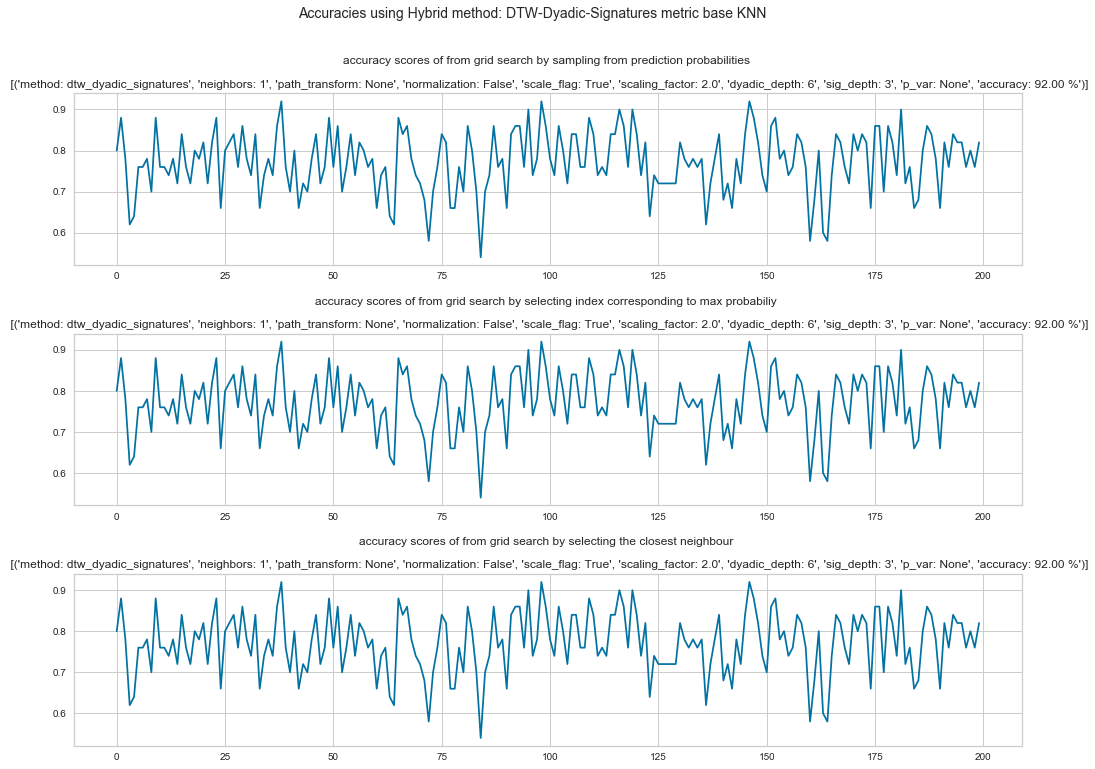

In [28]:
top_best=1
fix, ax = plt.subplots(3, 1, figsize=(17, 12))

legend0 = [list(scores_dic.keys())[best_index] + ('accuracy: {:.2f} %'.format(list(scores_dic.values())[best_index]*100.), ) for best_index in np.array(list(scores_dic.values())).argsort()[-top_best:][::-1]]
ax[0].plot(list(scores_dic.values()))
ax[0].set_title('accuracy scores of from grid search by sampling from prediction probabilities \n \n {}'.format(legend0))

legend1 = [list(scores_max_prob_dic.keys())[best_index] + ('accuracy: {:.2f} %'.format(list(scores_max_prob_dic.values())[best_index]*100.), ) for best_index in np.array(list(scores_dic.values())).argsort()[-top_best:][::-1]]
ax[1].plot(list(scores_max_prob_dic.values()))
ax[1].set_title('accuracy scores of from grid search by selecting index corresponding to max probabiliy \n \n {}'.format(legend1))

legend2 = [list(scores_nearest_neighbor_dic.keys())[best_index] + ('accuracy: {:.2f} %'.format(list(scores_nearest_neighbor_dic.values())[best_index]*100.), ) for best_index in np.array(list(scores_dic.values())).argsort()[-top_best:][::-1]]
ax[2].plot(list(scores_nearest_neighbor_dic.values()))
ax[2].set_title('accuracy scores of from grid search by selecting the closest neighbour \n \n {}'.format(legend2))

plt.subplots_adjust(hspace=0.4)
plt.suptitle('Accuracies using Hybrid method: DTW-Dyadic-Signatures metric base KNN', fontsize=14)
plt.show()

### Select best performing parameters and repeat the experiment but this time on the whole dataset

In [90]:
(probabilities, 
 predictions, 
 predictions_max_probability,
 predictions_nearest_neighbor, 
 yy_test) = RoughPaths_KNN(#model parameters
                           dyadic_depth=4, 
                           sig_depth=4, 
                           transform_flag=None, 
                           neighbors=1,  
                           normalization_flag=False, 
                           scale_flag=True, 
                           scale_factor=2., 
                           method='dtw_dyadic_signatures',  
                           p_var=None, 
                           
                           #printing options
                           verbose=True,
                           print_every_n_instances=5,
                           
                           #data restriction
                           use_all_data=False, 
                           resampling_size=5, 
                           use_centroids=False, 
                           test_all=False,
                           instances_to_test=100)

tested 5/100 --- partial_score: 100.00 % --- avg time: 0.3790 s
tested 10/100 --- partial_score: 100.00 % --- avg time: 0.3648 s
tested 15/100 --- partial_score: 80.00 % --- avg time: 0.3734 s
tested 20/100 --- partial_score: 80.00 % --- avg time: 0.3690 s
tested 25/100 --- partial_score: 84.00 % --- avg time: 0.3648 s
tested 30/100 --- partial_score: 86.67 % --- avg time: 0.3690 s
tested 35/100 --- partial_score: 88.57 % --- avg time: 0.3652 s
tested 40/100 --- partial_score: 90.00 % --- avg time: 0.3662 s
tested 45/100 --- partial_score: 88.89 % --- avg time: 0.3704 s
tested 50/100 --- partial_score: 90.00 % --- avg time: 0.3247 s
tested 55/100 --- partial_score: 89.09 % --- avg time: 0.3711 s
tested 60/100 --- partial_score: 86.67 % --- avg time: 0.3670 s
tested 65/100 --- partial_score: 87.69 % --- avg time: 0.3830 s
tested 70/100 --- partial_score: 88.57 % --- avg time: 0.3776 s
tested 75/100 --- partial_score: 86.67 % --- avg time: 0.3619 s
tested 80/100 --- partial_score: 87.50 

# I think the answer is Reinforcement Learning....

### As we progress in the test, we should learn from our mistakes in measuring similarity

## Confusion matrix

Confusion matrix, without normalization
[[19  0  0  0  0  0  0  0  0  0]
 [ 0  3  2  0  0  0  0  0  0  0]
 [ 0  1 11  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0]
 [ 0  1  0  0  7  0  2  0  0  0]
 [ 0  0  0  2  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0]
 [ 0  0  1  0  0  0  0  9  0  0]
 [ 0  0  0  1  0  2  0  0  7  0]
 [ 0  1  0  0  0  0  0  0  0  8]]


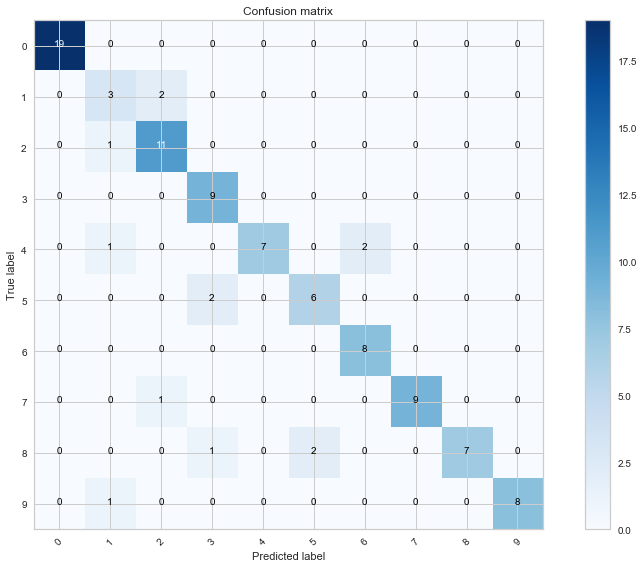

In [91]:
cm = confusion_matrix(y_true=yy_test, y_pred=predictions)
plot_confusion_matrix(cm)

## Roc Curve (for multiclass classification)

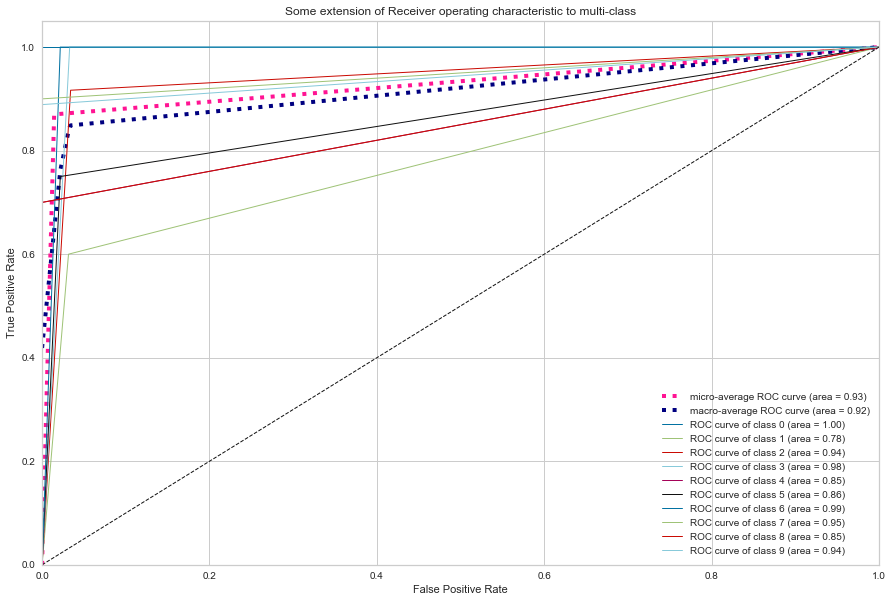

In [92]:
# binarize labels for ROC curve
y_test = label_binarize(np.array(yy_test), classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# compute probabilities
y_score = np.array(probabilities)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=10
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=1
plt.figure(figsize=(15, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle('bgrcmk')
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# t-SNE with best performing model

In [297]:
from sklearn.manifold import TSNE

In [373]:
def plot_mnist(X, y, X_embedded):
    number_of_colors = 10
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(frameon=False)
    plt.title("Two-dimensional embedding of {} handwritten digits from Pendigits Dataset with t-SNE".format(len(sigs)))
    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
    
    r = 0
    for label in np.unique(outputs_pendigits):
        indx = [idx for idx in range(len(y)) if y[idx] == label]
        plt.scatter(X_embedded[indx, 0], X_embedded[indx, 1], c=colors[label], label=label, marker="o")
        
    plt.legend()

In [470]:
depth = 3
sigs = [tosig.stream2sig(p, depth) for p in inputs_pendigits]

In [471]:
scaled_sigs = [sig_scale(sig=x, depth=depth) for x in sigs]

In [472]:
X_embedded = TSNE(n_components=3, 
                  perplexity=150, 
                  early_exaggeration=50.,
                  learning_rate = 30.,
                  n_iter=2000,
                  verbose=2, 
                  metric=sig_distance).fit_transform(np.array(scaled_sigs))

[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 7494 samples in 1.462s...
[t-SNE] Computed neighbors for 7494 samples in 1004.625s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7494
[t-SNE] Computed conditional probabilities for sample 2000 / 7494
[t-SNE] Computed conditional probabilities for sample 3000 / 7494
[t-SNE] Computed conditional probabilities for sample 4000 / 7494
[t-SNE] Computed conditional probabilities for sample 5000 / 7494
[t-SNE] Computed conditional probabilities for sample 6000 / 7494
[t-SNE] Computed conditional probabilities for sample 7000 / 7494
[t-SNE] Computed conditional probabilities for sample 7494 / 7494
[t-SNE] Mean sigma: 0.482255
[t-SNE] Computed conditional probabilities in 2.407s
[t-SNE] Iteration 50: error = 383.2978821, gradient norm = 0.0000001 (50 iterations in 32.379s)
[t-SNE] Iteration 100: error = 383.2978821, gradient norm = 0.0000025 (50 iterations in 27.329s)
[t-SNE] Iteration 150: error = 383.2975464, gradient

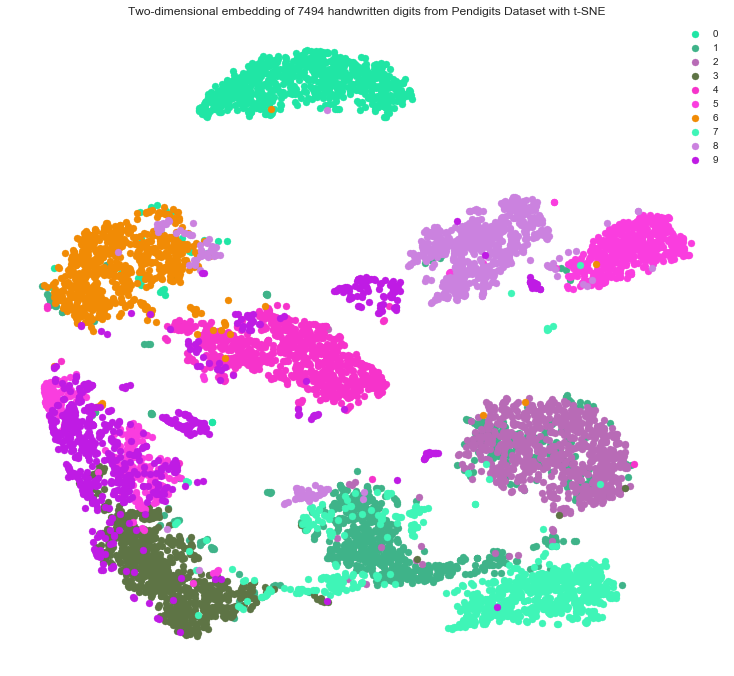

In [442]:
plot_mnist(np.array(sigs), outputs_pendigits, X_embedded)

# Plotly interactive 3-D plots

In [373]:
# import plotly.plotly as py
# import plotly.graph_objs as go
# import plotly

In [149]:
# traces = []
# for l in np.unique(outputs_pendigits):
#     indices = [ind for ind in range(len(outputs_pendigits)) if outputs_pendigits[ind]==l]
#     trace = go.Scatter3d(x=X_embedded[indices,0], 
#                          y=X_embedded[indices,1], 
#                          z=X_embedded[indices,2],
#                          mode='markers', 
#                          marker=dict(size=2, line=dict(color=colors[l],width=0.5),opacity=0.8)
#                          )
#     traces.append(trace)

In [148]:
# data = traces
# layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))

# # fig = go.Figure(data=data, layout=layout)
# # py.iplot(fig, filename='simple-3d-scatter')
# plotly.offline.plot(data, filename = 't-SNE on Signatures')

# Modified K-NN Classfier with threshold cut-off selection (Terry's idea)

In [140]:
# def cutoff_youdens_j(fpr,tpr,thresholds):
#     j_scores = tpr-fpr
#     j_ordered = sorted(zip(j_scores,thresholds))
#     return j_ordered[-1][1]

# def cutoff1(fpr, tpr, thresholds):
# #     optimal_idx = np.argmax(tpr - fpr)
#     optimal_idx = np.argmax(np.abs(tpr - fpr))
#     return thresholds[optimal_idx]

# def cutoff2(fpr, tpr, thresholds):
#     opt_idx = np.argmin(np.sqrt(np.square(1-tpr) + np.square(fpr)))
#     return thresholds[opt_idx]

In [141]:
# def ROC_classifier(depth=4, transform_flag=None, scale_flag=True, neighbors=4, k_folds=6):

#     assert scale_flag in [True, False]
    
#     print('--calculating signatures at level {}'.format(depth))
#     if scale_flag:
#         if transform_flag is None:
#             S_train = [sig_scale(tosig.stream2sig(p, depth), 2) for p in which_transform(transform_flag)[0]]
#             S_test = [sig_scale(tosig.stream2sig(p, depth), 2) for p in which_transform(transform_flag)[2]]
#         else:
#             S_train = [sig_scale(tosig.stream2sig(p, depth), 3) for p in which_transform(transform_flag)[0]]
#             S_test = [sig_scale(tosig.stream2sig(p, depth), 3) for p in which_transform(transform_flag)[2]]
#     else:
#         S_train = [tosig.stream2sig(p, depth) for p in which_transform(transform_flag)[0]]
#         S_test = [tosig.stream2sig(p, depth) for p in which_transform(transform_flag)[2]]
        
#     y_train, y_test = which_transform(transform_flag)[1], which_transform(transform_flag)[3]
    
#     # folds for cross validation
#     cv = StratifiedKFold(n_splits=k_folds)

#     # Learn to predict each class against the other
#     neighbors = 4
#     classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=neighbors, 
#                                                           algorithm='auto', 
#                                                           metric='euclidean', 
#                                                           weights='distance')
#                                     )

#     # Compute optimal threshold via AUROC
#     n_classes = 10
#     optimal_thresholds = {i:0. for i in range(n_classes)}

#     # convert for stratified CV
#     x_train = np.array(S_train)
#     label_train = np.array(y_train).reshape(-1,)

#     f = 1
#     for train, test in cv.split(x_train, label_train):

#         print('calibrating optimal threshold in fold {} out of {}--'.format(f, k_folds))

#         # Binarize the output
#         y_train_binary = label_binarize(label_train[train], classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#         y_test_binary = label_binarize(label_train[test], classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#         fpr = dict()
#         tpr = dict()
#         thresholds = dict()
#         roc_auc = dict()

#         y_score = classifier.fit(x_train[train], y_train_binary).predict_proba(x_train[test])

#         for i in range(n_classes):
#             fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binary[:, i], y_score[:, i])
#             roc_auc[i] = auc(fpr[i], tpr[i])
#     #         optimal_thresholds[i] += cutoff_youdens_j(fpr[i], tpr[i], thresholds[i])
# #             optimal_thresholds[i] += cutoff1(fpr[i], tpr[i], thresholds[i])
#             optimal_thresholds[i] += cutoff2(fpr[i], tpr[i], thresholds[i])

#         f+=1

#     # Average or max?
#     for i in range(n_classes):
#         optimal_thresholds[i] /= k_folds
    
#     print('--classifying--')
#     classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=neighbors, 
#                                                           algorithm='auto', 
#                                                           metric='euclidean', 
#                                                           weights='distance')
#                                     )
#     y_train_binarized = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#     y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#     clf = classifier.fit(S_train, y_train_binarized)
#     y_predicted_test = clf.predict(S_test)
#     y_score_test = clf.predict_proba(S_test)
    
#     return optimal_thresholds, y_predicted_test, y_score_test

In [142]:
# optimal_thresholds, y_predicted_test, y_score_test = ROC_classifier(depth=4, 
#                                                                     transform_flag=None, 
#                                                                     scale_flag=False, 
#                                                                     neighbors=3, 
#                                                                     k_folds=5)

In [143]:
# true_predictions = dict()
# i=0
# for labels, probabilities in zip(y_predicted_test, y_score_test):
#     predicted_digit = np.argmax(probabilities)
#     if np.max(probabilities)<optimal_thresholds[predicted_digit]:
#         true_predictions[i] = np.random.choice(list(range(10)), 1, p=probabilities)[0]
#     else:
#         true_predictions[i] = predicted_digit
#     i+=1
    
# _,_,a_test,b_test = which_transform()
# misclassified = []
# for k in range(len(b_test)):
#     if (b_test[k] != list(true_predictions.values())[k]):
#         misclassified.append(a_test[k])
# print('accuracy: {}'.format(1 - len(misclassified)/len(a_test)))

In [144]:
# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# n_classes = 10
# bb = label_binarize(b_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(bb[:, i], y_score_test[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
    
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(bb.ravel(), y_score_test.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [145]:
# # Compute macro-average ROC curve and ROC area

# # First aggregate all false positive rates
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# # Then interpolate all ROC curves at this points
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# # Finally average it and compute AUC
# mean_tpr /= n_classes

# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# # Plot all ROC curves
# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=1,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=1)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
# plt.legend(loc="lower right")
# plt.show()

In [146]:
# # Compute confusion matrix
# cnf_matrix = confusion_matrix(b_test, list(true_predictions.values()))
# np.set_printoptions(precision=2)

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

# plt.show()